## **Importing Required Libraries**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns

## **Step 1- Loading the Dataset**

In [3]:
df = pd.read_csv(r"data\churn_dataset.csv")
df.head() 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## **Step 2 - Exploratory Data Analysis (EDA)**

In [5]:
df.shape

(7043, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df['TotalCharges'] = df['TotalCharges'].apply(lambda x: 0 if x == ' ' else float(x))

In [10]:
print(df['TotalCharges'].dtype)

float64


### **2a - Univariate Analysis**

In [20]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [22]:
# Separating numerical and categorical columns
numeric_df = df.select_dtypes(include = ['number'])
categorical_df = df.select_dtypes(include = ['object'])

print(categorical_df.shape)
print(numeric_df.shape) 

(7043, 17)
(7043, 4)


<Axes: title={'center': 'Total Charges'}, xlabel='TotalCharges', ylabel='Count'>

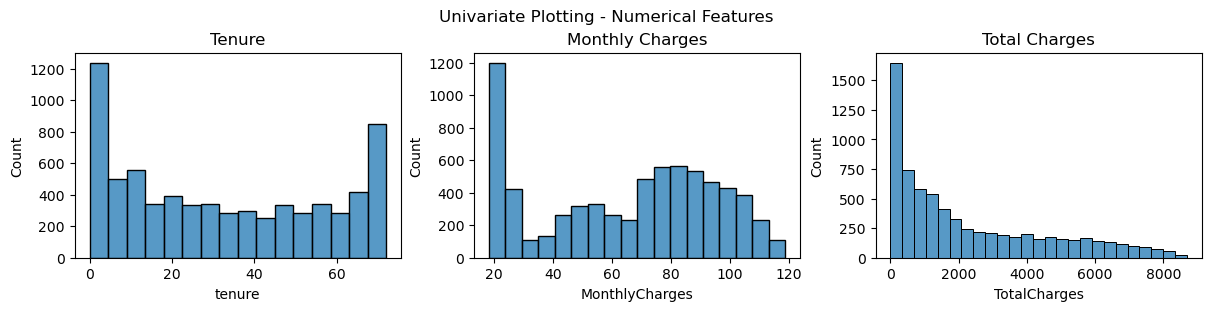

In [24]:
# Univariate - Numerical Analysis

fig, axs = plt.subplots(1, 3, figsize=(12, 3), constrained_layout=True)
fig.suptitle("Univariate Plotting - Numerical Features")

axs[0].set_title("Tenure")
sns.histplot(data=df, x='tenure', ax=axs[0])

axs[1].set_title('Monthly Charges')
sns.histplot(data = df, x = 'MonthlyCharges', ax = axs[1])

axs[2].set_title('Total Charges')
sns.histplot(data = df, x = 'TotalCharges', ax = axs[2])

<Axes: xlabel='Churn', ylabel='count'>

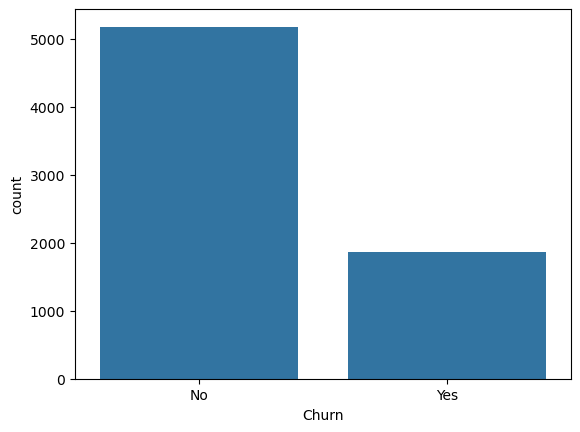

In [28]:
# Univariate - Categorical Analysis

sns.countplot(data = df, x = 'Churn')

### **2b - Bivariate Analysis**

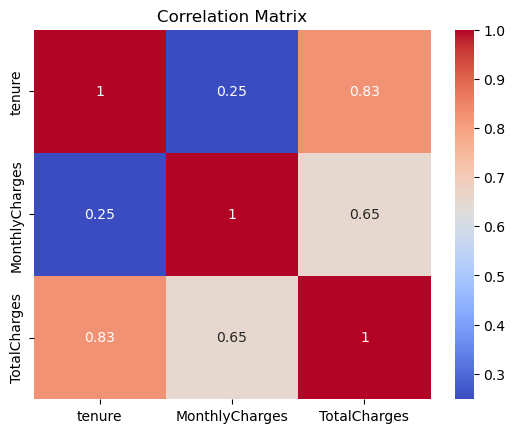

In [18]:
# Bivariate - Numerical vs Numerical Analysis

correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show() 

<Axes: title={'center': 'Dependents vs Churn'}, xlabel='TotalCharges', ylabel='Churn'>

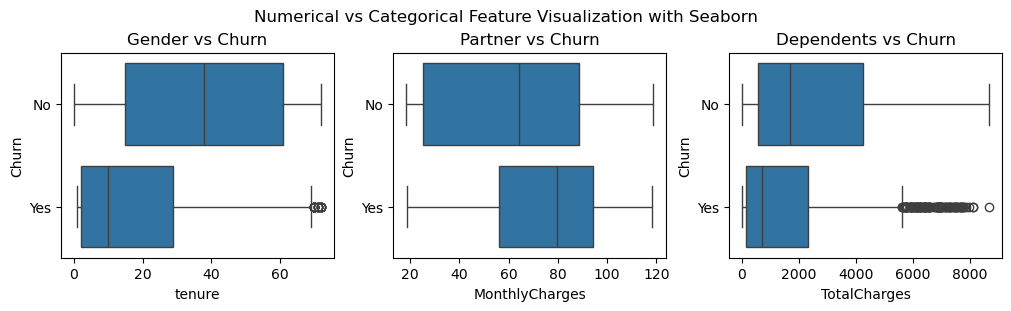

In [75]:
# Bivariate - Categorical vs Numerical Analysis

fig, axs = plt.subplots(1, 3, figsize=(10, 3), constrained_layout=True)
fig.suptitle("Numerical vs Categorical Feature Visualization with Seaborn")

axs[0].set_title('Gender vs Churn')
sns.boxplot(data = df, x = 'tenure', y = 'Churn', ax=axs[0])

axs[1].set_title('Partner vs Churn')
sns.boxplot(data = df, x = 'MonthlyCharges', y = 'Churn', ax = axs[1])

axs[2].set_title('Dependents vs Churn')
sns.boxplot(data = df, x = 'TotalCharges', y = 'Churn', ax = axs[2])

#### **Note : Rather than visualizing All Categorical Columns Using `Decision Tree` finding out Best input Features**

In [77]:
# Using Decision tree finding out best features

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

X = categorical_df.drop(columns=['Churn', 'customerID'])
y = categorical_df['Churn']

# Initialize LabelEncoder
encoder = LabelEncoder()

# Encode each categorical column
for column in X:
    X[column] = encoder.fit_transform(X[column])

# Get final feature names
feature_names = list(X.columns)

# Initialize Decision Tree model
model = DecisionTreeClassifier(random_state=0)

# Fit the model
model.fit(X, y)

# Get feature importances
feature_importances = model.feature_importances_

# Create DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False) 

print()
print(f"List of Best input features : {list(feature_importance_df['Feature'])}")


List of Best input features : ['Contract', 'PaymentMethod', 'OnlineSecurity', 'MultipleLines', 'gender', 'StreamingMovies', 'Dependents', 'DeviceProtection', 'PaperlessBilling', 'Partner', 'StreamingTV', 'TechSupport', 'InternetService', 'OnlineBackup', 'PhoneService']


<Axes: title={'center': 'OnlineSecurity vs Churn'}, xlabel='OnlineSecurity', ylabel='count'>

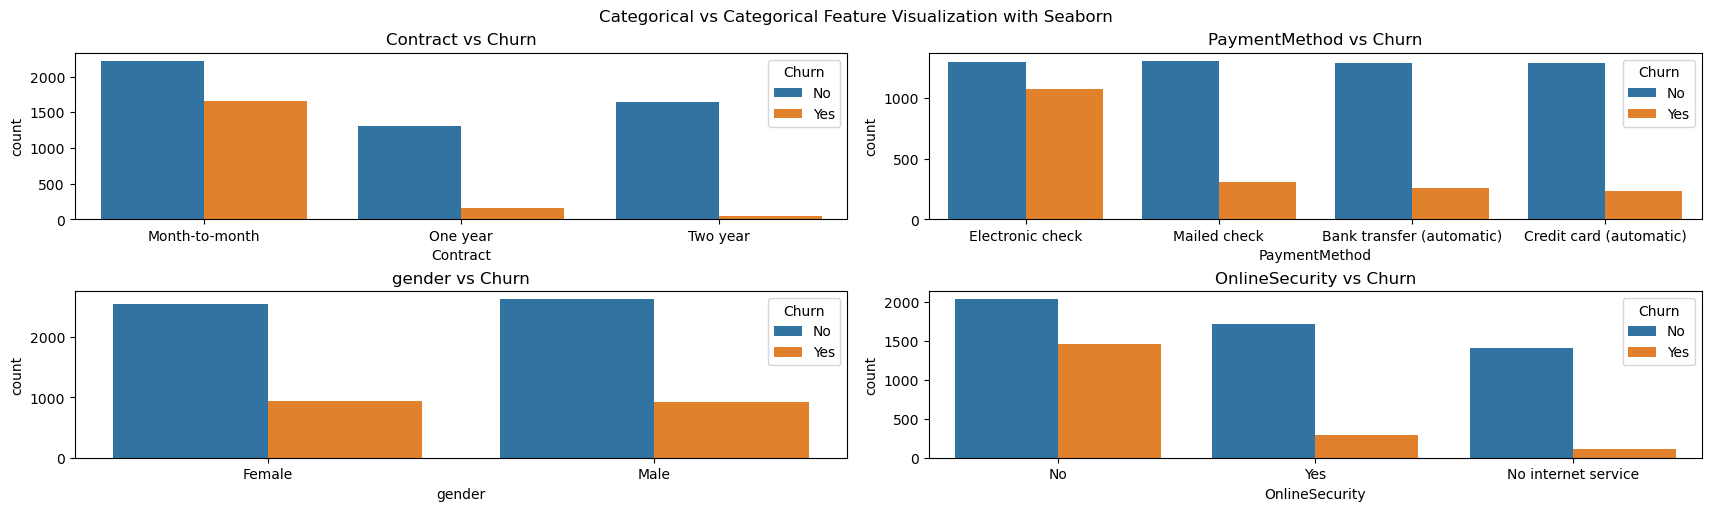

In [79]:
# Bivariate Categorical vs Categorical Analysis

fig, axs = plt.subplots(2, 2, figsize=(17,5), constrained_layout=True)
fig.suptitle('Categorical vs Categorical Feature Visualization with Seaborn')

axs[0, 0].set_title('Contract vs Churn')
sns.countplot(data=df, x='Contract', hue='Churn', ax=axs[0, 0])

axs[0, 1].set_title('PaymentMethod vs Churn')
sns.countplot(data=df, x='PaymentMethod', hue='Churn', ax=axs[0, 1])

axs[1, 0].set_title('gender vs Churn')
sns.countplot(data=df, x='gender', hue='Churn', ax=axs[1, 0])

axs[1, 1].set_title('OnlineSecurity vs Churn')
sns.countplot(data=df, x='OnlineSecurity', hue='Churn', ax=axs[1, 1])

<Axes: title={'center': 'StreamingMovies vs Churn'}, xlabel='StreamingMovies', ylabel='count'>

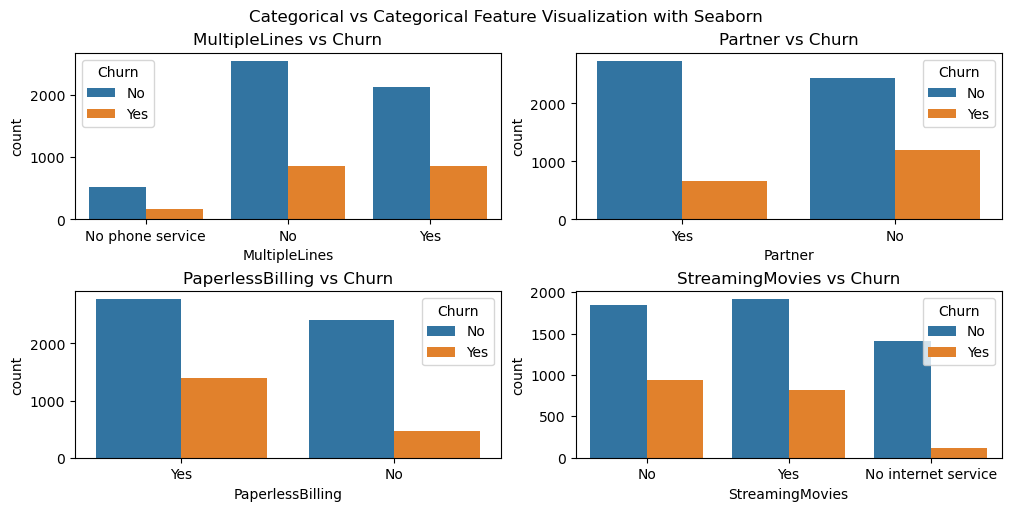

In [26]:
# Bivariate Categorical vs Categorical Analysis

fig, axs = plt.subplots(2, 2, figsize=(10,5), constrained_layout=True)
fig.suptitle('Categorical vs Categorical Feature Visualization with Seaborn')

axs[0, 0].set_title('MultipleLines vs Churn')
sns.countplot(data=df, x='MultipleLines', hue='Churn', ax=axs[0, 0])

axs[0, 1].set_title('Partner vs Churn')
sns.countplot(data=df, x='Partner', hue='Churn', ax=axs[0, 1])

axs[1, 0].set_title('PaperlessBilling vs Churn')
sns.countplot(data=df, x='PaperlessBilling', hue='Churn', ax=axs[1, 0])

axs[1, 1].set_title('StreamingMovies vs Churn')
sns.countplot(data=df, x='StreamingMovies', hue='Churn', ax=axs[1, 1])

## **Step 3 - Segregate Inputs (X) and Output (y)**

In [30]:
# Define the predictors (X) and target variable (y)

X = df.drop(columns = ['Churn','customerID'])
y = df['Churn'] 

## **Step 4 - Split the data into Train and Test**

In [32]:
# Split into train and test 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=0)

print(X_train.shape)
print(X_test.shape)

(5282, 19)
(1761, 19)


## **Step 5 - Apply Data Preparation on Training Data**

#### **Separate Numerical and Categorical columns**

In [85]:
# Separating Categorical and Numerical Columns

X_train_cat = X_train.select_dtypes(include=['object'])
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

#### **Numerical Feature Transformation: Applying Normalization `(Note: We won't use Normalization Transformation)`**

In [91]:
# Rescaling Numerical features

from sklearn.preprocessing import MinMaxScaler

min_max = MinMaxScaler()
X_train_num_transformed = pd.DataFrame(min_max.fit_transform(X_train_num),
                                      columns = min_max.get_feature_names_out(),
                                      index = X_train_num.index)
X_train_num_transformed.head() 

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
3296,0.0,0.333333,0.309263,0.142001
6397,1.0,0.750000,0.468127,0.406452
6043,0.0,0.041667,0.218127,0.015055
5309,0.0,0.847222,0.019920,0.147246
3000,0.0,0.166667,0.659363,0.122001


In [345]:
# Let's now analyse the properties of min_max

print("Number of Numerical features;", min_max.n_features_in_)
print("Output Feature Names:", min_max.get_feature_names_out())
print("Minimum of each column:", min_max.data_min_) 
print("Maximum of each column:", min_max.data_max_) 

Number of Numerical features; 4
Output Feature Names: ['SeniorCitizen' 'tenure' 'MonthlyCharges' 'TotalCharges']
Minimum of each column: [ 0.    0.   18.25  0.  ]
Maximum of each column: [1.0000e+00 7.2000e+01 1.1865e+02 8.6848e+03]


In [95]:
X_train_num_transformed.describe().round(2) 

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5282.00,5282.00,5282.00,5282.00
mean,0.16,0.45,0.46,0.26
std,0.37,0.34,0.30,0.26
min,0.00,0.00,0.00,0.00
25%,0.00,0.12,0.17,0.05
50%,0.00,0.40,0.52,0.16
75%,0.00,0.76,0.71,0.43
max,1.00,1.00,1.00,1.00


#### **Numerical Feature Transformation: Applying Standardization**

In [97]:
# Rescaling Numerical Features

from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()

X_train_num_transformed = pd.DataFrame(standard_scaler.fit_transform(X_train_num),
                                      columns = standard_scaler.get_feature_names_out(),
                                      index = X_train_num.index)
X_train_num_transformed.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
3296,-0.435476,-0.340191,-0.514314,-0.460284
6397,2.296336,0.883210,0.017840,0.556508
6043,-0.435476,-1.196572,-0.819594,-0.948382
5309,-0.435476,1.168670,-1.483535,-0.440119
3000,-0.435476,-0.829552,0.658427,-0.537185


In [99]:
# Let's now analyse the properties of standard_scaler

print("Number of Numerical Features:", standard_scaler.n_features_in_) 
print("output Feture Names:", standard_scaler.get_feature_names_out()) 
print("Mean of each column:", standard_scaler.mean_) 
print("Std of each column:", np.sqrt(standard_scaler.var_))

Number of Numerical Features: 4
output Feture Names: ['SeniorCitizen' 'tenure' 'MonthlyCharges' 'TotalCharges']
Mean of each column: [1.59409315e-01 3.23421053e+01 6.47152878e+01 2.27292614e+03]
Std of each column: [3.66057352e-01 2.45218061e+01 2.99725187e+01 2.25876892e+03]


In [101]:
X_train_num_transformed.describe().round(2)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5282.00,5282.00,5282.00,5282.00
mean,-0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00
min,-0.44,-1.32,-1.55,-1.01
25%,-0.44,-0.95,-0.97,-0.83
50%,-0.44,-0.14,0.19,-0.39
75%,-0.44,0.92,0.84,0.66
max,2.30,1.62,1.80,2.84


#### **Categorical Feature Transformation : Applying One Hot Encoding**

In [123]:
#OneHotEncoding the feature transformation

from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse_output= False,
                               handle_unknown="ignore")
X_train_cat_transformed = pd.DataFrame(onehot_encoder.fit_transform(X_train_cat),
                                      columns = onehot_encoder.get_feature_names_out(),
                                      index = X_train_cat.index)

print("Shape of Data before Transformation:", X_train_cat.shape)
print("Shape of Data After Transformation:", X_train_cat_transformed.shape)

X_train_cat_transformed.head()

Shape of Data before Transformation: (5282, 15)
Shape of Data After Transformation: (5282, 41)


,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3296,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
6397,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
6043,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5309,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3000,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [343]:
# Let's now analyse properties of OneHotEncoder

print("Applied encoding on:", onehot_encoder.feature_names_in_)
print("-"* 100)
print("Unique Categories:", onehot_encoder.categories_)
print("-" * 100 )
print("Feature Names after encoding:", onehot_encoder.get_feature_names_out())

Applied encoding on: ['gender' 'Partner' 'Dependents' 'PhoneService' 'MultipleLines'
 'InternetService' 'OnlineSecurity' 'OnlineBackup' 'DeviceProtection'
 'TechSupport' 'StreamingTV' 'StreamingMovies' 'Contract'
 'PaperlessBilling' 'PaymentMethod']
----------------------------------------------------------------------------------------------------
Unique Categories: [array(['Female', 'Male'], dtype=object), array(['No', 'Yes'], dtype=object), array(['No', 'Yes'], dtype=object), array(['No', 'Yes'], dtype=object), array(['No', 'No phone service', 'Yes'], dtype=object), array(['DSL', 'Fiber optic', 'No'], dtype=object), array(['No', 'No internet service', 'Yes'], dtype=object), array(['No', 'No internet service', 'Yes'], dtype=object), array(['No', 'No internet service', 'Yes'], dtype=object), array(['No', 'No internet service', 'Yes'], dtype=object), array(['No', 'No internet service', 'Yes'], dtype=object), array(['No', 'No internet service', 'Yes'], dtype=object), array(['Month-to-mo

In [133]:
# Concatenate X_train_num_transformed and X_train_cat_transformed

X_train_transformed = pd.concat([X_train_num_transformed, X_train_cat_transformed], axis=1)

X_train_transformed.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3296,-0.435476,-0.340191,-0.514314,-0.460284,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
6397,2.296336,0.883210,0.017840,0.556508,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
6043,-0.435476,-1.196572,-0.819594,-0.948382,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5309,-0.435476,1.168670,-1.483535,-0.440119,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3000,-0.435476,-0.829552,0.658427,-0.537185,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## **Step 7 - Apply Data Preparation on Test Data**

In [207]:
# Separating Categorical and Numerical Columns

X_test_cat = X_test.select_dtypes(include=['object'])
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

In [209]:
# Apply transformation on numerical data

X_test_num_transformed = pd.DataFrame(standard_scaler.transform(X_test_num),
                                      columns = standard_scaler.get_feature_names_out(),
                                      index = X_test_num.index)
X_test_num_transformed.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
2200,-0.435476,-0.544091,-0.217375,-0.543516
4627,-0.435476,1.127890,1.731076,2.114680
3225,-0.435476,-0.788772,0.241378,-0.597262
2828,-0.435476,-1.278132,-1.476862,-0.997214
3768,-0.435476,0.923990,0.434889,0.882549


In [211]:
# Apply transformation on categorical data

X_test_cat_transformed = pd.DataFrame(onehot_encoder.transform(X_test_cat),
                                     columns = onehot_encoder.get_feature_names_out(), 
                                     index = X_test_cat.index)

X_test_cat_transformed.head()

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2200,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4627,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3225,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2828,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3768,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [213]:
# concatenate X_test_num_transformed and X_test_cat_transformed

X_test_transformed = pd.concat([X_test_num_transformed, X_test_cat_transformed], axis = 1)

X_test_transformed.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2200,-0.435476,-0.544091,-0.217375,-0.543516,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4627,-0.435476,1.127890,1.731076,2.114680,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3225,-0.435476,-0.788772,0.241378,-0.597262,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2828,-0.435476,-1.278132,-1.476862,-0.997214,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3768,-0.435476,0.923990,0.434889,0.882549,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


## **Step 6, 8 and 9 - Training and Testing Phase**

### **a. Logistic Regression** 
#### **Note : Evaluating model using `train score` and `test score`**

In [285]:
%%time

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

classifier = LogisticRegression()
classifier.fit(X_train_transformed, y_train)

y_train_pred = classifier.predict(X_train_transformed)

print("Model's Accuracy on Train Data:", metrics.accuracy_score(y_train, y_train_pred))
print()

Model's Accuracy on Train Data: 0.8074592957213177

CPU times: total: 93.8 ms
Wall time: 53.9 ms


In [287]:
%%time

from sklearn import metrics

classifier = LogisticRegression()
classifier.fit(X_train_transformed, y_train)

y_test_pred = classifier.predict(X_test_transformed)

print("Model's Accuracy on Test Data:", metrics.accuracy_score(y_test, y_test_pred))
print()

Model's Accuracy on Test Data: 0.7989778534923339

CPU times: total: 31.2 ms
Wall time: 47.5 ms


### **b. K Nearest Neighbor**

In [293]:
%%time

from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
classifier.fit(X_train_transformed, y_train)

y_train_pred = classifier.predict(X_train_transformed)

print("Model's Accuracy on Train Data:", metrics.accuracy_score(y_train, y_train_pred))
print()

Model's Accuracy on Train Data: 0.836804240817872

CPU times: total: 875 ms
Wall time: 1.13 s


In [295]:
%%time

from sklearn import metrics

classifier  = KNeighborsClassifier()
classifier.fit(X_train_transformed, y_train)

y_test_pred = classifier.predict(X_test_transformed)

print("Model's Accuracy on Test Data:", metrics.accuracy_score(y_test, y_test_pred))
print()

Model's Accuracy on Test Data: 0.7416240772288473

CPU times: total: 422 ms
Wall time: 297 ms


### **c. Decision Tree**

In [319]:
%%time

from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
classifier.fit(X_train_transformed, y_train)

y_train_pred = classifier.predict(X_train_transformed)

print("Model's Accuracy on Train Data:", metrics.accuracy_score(y_train, y_train_pred))
print()

Model's Accuracy on Train Data: 0.9973494888299886

CPU times: total: 78.1 ms
Wall time: 160 ms


In [321]:
%%time

from sklearn import metrics

classifier  = DecisionTreeClassifier()
classifier.fit(X_train_transformed, y_train)

y_test_pred = classifier.predict(X_test_transformed)

print("Model's Accuracy on Test Data:", metrics.accuracy_score(y_test, y_test_pred))
print() 

Model's Accuracy on Test Data: 0.7473026689381034

CPU times: total: 46.9 ms
Wall time: 90.6 ms


In [337]:
Feture_importance = pd.DataFrame({"Feature": classifier.feature_names_in_,
                                "Featute_importance": classifier.feature_importances_})
Feture_importance

,Feature,Featute_importance
0,SeniorCitizen,0.030719
1,tenure,0.123956
2,MonthlyCharges,0.185199
3,TotalCharges,0.166955
4,gender_Female,0.014443
5,gender_Male,0.015450
6,Partner_No,0.009099
7,Partner_Yes,0.016147
8,Dependents_No,0.010321
9,Dependents_Yes,0.013105


### **d. Random Forest**

In [299]:
%%time

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()
classifier.fit(X_train_transformed, y_train)

y_train_pred = classifier.predict(X_train_transformed)

print("Model's Accuracy on Train Data:", metrics.accuracy_score(y_train, y_train_pred))
print()

Model's Accuracy on Train Data: 0.9973494888299886

CPU times: total: 1.03 s
Wall time: 1.63 s


In [301]:
%%time

from sklearn import metrics

classifier  = RandomForestClassifier()
classifier.fit(X_train_transformed, y_train)

y_test_pred = classifier.predict(X_test_transformed)

print("Model's Accuracy on Test Data:", metrics.accuracy_score(y_test, y_test_pred))
print() 

Model's Accuracy on Test Data: 0.7717206132879046

CPU times: total: 859 ms
Wall time: 1.49 s


- **Important Observations** 
    1. `Logistic Regression` was the Best Model.
    2. `Learning and Generalizability` was best compared to other Models

# **Writting Pipelines to Automate the Workflow**

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [39]:
pipelines = {
    'knn' : Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', KNeighborsClassifier())
    ]), 
    'svc' : Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', SVC())
    ]),
    'logistic_regression': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', LogisticRegression())
    ]),
    'random_forest': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', RandomForestClassifier())
    ]),
    'decision_tree': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', DecisionTreeClassifier())
    ]),
    'naive_bayes': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', GaussianNB())
    ])
}

# Define parameter grid for each algorithm
param_grids = {
    'knn': [
        {
            'scaler': [StandardScaler(), MinMaxScaler()],
            'classifier__n_neighbors' : [i for i in range(3, 21, 2)], 
            'classifier__p' : [1, 2, 3]
        }
    ],
    'svc': [
        {
            'scaler': [StandardScaler(), MinMaxScaler()],
            'classifier__kernel' : ['rbf'], 
            'classifier__C' : [0.1, 0.01, 1, 10, 100]
        }, 
        {
            'scaler': [StandardScaler(), MinMaxScaler()],
            'classifier__kernel' : ['poly'], 
            'classifier__degree' : [2, 3, 4, 5], 
            'classifier__C' : [0.1, 0.01, 1, 10, 100]
        }, 
        {
            'scaler': [StandardScaler(), MinMaxScaler()],
            'classifier__kernel' : ['linear'], 
            'classifier__C' : [0.1, 0.01, 1, 10, 100]
        }
    ],
    'logistic_regression': [
        {
            'scaler': [StandardScaler(), MinMaxScaler()],
            'classifier__C': [0.1, 1, 10], 
            'classifier__penalty': ['l2']
        }, 
        {
            'scaler': [StandardScaler(), MinMaxScaler()],
            'classifier__C': [0.1, 1, 10], 
            'classifier__penalty': ['l1'], 
            'classifier__solver': ['liblinear']
        }, 
        {
            'scaler': [StandardScaler(), MinMaxScaler()],
            'classifier__C': [0.1, 1, 10], 
            'classifier__penalty': ['elasticnet'], 
            'classifier__l1_ratio': [0.4, 0.5, 0.6],
            'classifier__solver': ['saga']
        }
    ],
    'random_forest': [
        {
            'scaler': [StandardScaler(), MinMaxScaler()],
            'classifier__n_estimators': [50, 100, 200]
        }
    ],
    'decision_tree': [
        {
            'scaler': [StandardScaler(), MinMaxScaler()],
            'classifier__max_depth': [None, 5, 10]
        }
    ],
    'naive_bayes': [
        {
            'scaler': [StandardScaler(), MinMaxScaler()]
        }
    ]
}

# Perform GridSearchCV for each algorithm
best_models = {}

for algo in pipelines.keys():
    print("*"*10, algo, "*"*10)
    grid_search = GridSearchCV(estimator=pipelines[algo], 
                               param_grid=param_grids[algo], 
                               cv=5, 
                               scoring='accuracy', 
                               return_train_score=True,
                               verbose=1
                              )
    
    %time grid_search.fit(X_train, y_train)
    
    best_models[algo] = grid_search.best_estimator_
    
    print('Score on Test Data: ', grid_search.score(X_test, y_test))

********** knn **********
Fitting 5 folds for each of 54 candidates, totalling 270 fits


ValueError: 
All the 270 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\VARSHINA\ANACONDA\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\VARSHINA\ANACONDA\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\VARSHINA\ANACONDA\Lib\site-packages\sklearn\pipeline.py", line 471, in fit
    Xt = self._fit(X, y, routed_params)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\VARSHINA\ANACONDA\Lib\site-packages\sklearn\pipeline.py", line 408, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\VARSHINA\ANACONDA\Lib\site-packages\joblib\memory.py", line 312, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\VARSHINA\ANACONDA\Lib\site-packages\sklearn\pipeline.py", line 1303, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\VARSHINA\ANACONDA\Lib\site-packages\sklearn\utils\_set_output.py", line 295, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\VARSHINA\ANACONDA\Lib\site-packages\sklearn\base.py", line 1101, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\VARSHINA\ANACONDA\Lib\site-packages\sklearn\preprocessing\_data.py", line 876, in fit
    return self.partial_fit(X, y, sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\VARSHINA\ANACONDA\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\VARSHINA\ANACONDA\Lib\site-packages\sklearn\preprocessing\_data.py", line 912, in partial_fit
    X = self._validate_data(
        ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\VARSHINA\ANACONDA\Lib\site-packages\sklearn\base.py", line 633, in _validate_data
    out = check_array(X, input_name="X", **check_params)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\VARSHINA\ANACONDA\Lib\site-packages\sklearn\utils\validation.py", line 997, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\VARSHINA\ANACONDA\Lib\site-packages\sklearn\utils\_array_api.py", line 521, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\VARSHINA\ANACONDA\Lib\site-packages\pandas\core\generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'Female'

--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\VARSHINA\ANACONDA\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\VARSHINA\ANACONDA\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\VARSHINA\ANACONDA\Lib\site-packages\sklearn\pipeline.py", line 471, in fit
    Xt = self._fit(X, y, routed_params)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\VARSHINA\ANACONDA\Lib\site-packages\sklearn\pipeline.py", line 408, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\VARSHINA\ANACONDA\Lib\site-packages\joblib\memory.py", line 312, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\VARSHINA\ANACONDA\Lib\site-packages\sklearn\pipeline.py", line 1303, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\VARSHINA\ANACONDA\Lib\site-packages\sklearn\utils\_set_output.py", line 295, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\VARSHINA\ANACONDA\Lib\site-packages\sklearn\base.py", line 1101, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\VARSHINA\ANACONDA\Lib\site-packages\sklearn\preprocessing\_data.py", line 450, in fit
    return self.partial_fit(X, y)
           ^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\VARSHINA\ANACONDA\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\VARSHINA\ANACONDA\Lib\site-packages\sklearn\preprocessing\_data.py", line 490, in partial_fit
    X = self._validate_data(
        ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\VARSHINA\ANACONDA\Lib\site-packages\sklearn\base.py", line 633, in _validate_data
    out = check_array(X, input_name="X", **check_params)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\VARSHINA\ANACONDA\Lib\site-packages\sklearn\utils\validation.py", line 997, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\VARSHINA\ANACONDA\Lib\site-packages\sklearn\utils\_array_api.py", line 521, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\VARSHINA\ANACONDA\Lib\site-packages\pandas\core\generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'Female'


AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [49]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np


# Handling categorical and numerical columns
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()  # List your categorical columns
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()  # List your numerical columns


# Create transformers for numerical and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Define the pipelines for each algorithm
pipelines = {
    'knn' : Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', KNeighborsClassifier())
    ]), 
    'svc' : Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', SVC())
    ]),
    'logistic_regression': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression())
    ]),
    'random_forest': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier())
    ]),
    'decision_tree': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', DecisionTreeClassifier())
    ]),
    'naive_bayes': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', GaussianNB())
    ])
}

# Define parameter grid for each algorithm
param_grids = {
    'knn': [
        {
            'classifier__n_neighbors' : [i for i in range(3, 21, 2)], 
            'classifier__p' : [1, 2, 3]
        }
    ],
    'svc': [
        {
            'classifier__kernel' : ['rbf'], 
            'classifier__C' : [0.1, 0.01, 1, 10, 100]
        }, 
        {
            'classifier__kernel' : ['poly'], 
            'classifier__degree' : [2, 3, 4, 5], 
            'classifier__C' : [0.1, 0.01, 1, 10, 100]
        }, 
        {
            'classifier__kernel' : ['linear'], 
            'classifier__C' : [0.1, 0.01, 1, 10, 100]
        }
    ],
    'logistic_regression': [
        {
            'classifier__C': [0.1, 1, 10], 
            'classifier__penalty': ['l2']
        }, 
        {
            'classifier__C': [0.1, 1, 10], 
            'classifier__penalty': ['l1'], 
            'classifier__solver': ['liblinear']
        }, 
        {
            'classifier__C': [0.1, 1, 10], 
            'classifier__penalty': ['elasticnet'], 
            'classifier__l1_ratio': [0.4, 0.5, 0.6],
            'classifier__solver': ['saga']
        }
    ],
    'random_forest': [
        {
            'classifier__n_estimators': [50, 100, 200]
        }
    ],
    'decision_tree': [
        {
            'classifier__max_depth': [None, 5, 10]
        }
    ],
    'naive_bayes': [
        {}  # No hyperparameters for Naive Bayes
    ]
}

# Perform GridSearchCV for each algorithm
best_models = {}

for algo in pipelines.keys():
    print("*"*10, algo, "*"*10)
    
    grid_search = GridSearchCV(
        estimator=pipelines[algo], 
        param_grid=param_grids[algo], 
        cv=5, 
        scoring='accuracy', 
        return_train_score=True,
        verbose=1
    )
    
    %time grid_search.fit(X_train, y_train)
    
    # Store the best model after grid search
    best_models[algo] = grid_search.best_estimator_
    
    # Output the performance on test data
    print('Score on Test Data: ', grid_search.score(X_test, y_test))

# Check the best models
print("Best models after Grid Search: ", best_models)

********** knn **********
Fitting 5 folds for each of 27 candidates, totalling 135 fits


C:\Users\VARSHINA\ANACONDA\Lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\VARSHINA\ANACONDA\Lib\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\VARSHINA\ANACONDA\Lib\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\VARSHINA\ANACONDA\Lib\site-packages\sklearn\metrics\_scorer.py", line 345, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "C:\Users\VARSHINA\ANACONDA\Lib\site-packages\sklearn\metrics\_scorer.py", lin

CPU times: total: 18 s
Wall time: 14.6 s
Score on Test Data:  0.7864849517319704
********** svc **********
Fitting 5 folds for each of 30 candidates, totalling 150 fits


KeyboardInterrupt: 

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'